In [209]:
%matplotlib inline

from datetime import datetime, timedelta

import pandas as pd
import numpy as np

def load_data(filename):
    data = pd.read_table(filename, header=0)
    data = data.rename(columns=lambda x: x.strip().lower().replace(" ", "_"))
    data["start_time"] = pd.to_datetime(data["start_time"])
    data["start_time_numpy"] = data["start_time"].astype(datetime)
    data["end_time"] = pd.to_datetime(data["end_time"])
    data["end_time_numpy"] = data["end_time"].astype(datetime)

    return data

In [210]:
a_sensors_training = load_data('UserA_Sensors_training.csv')
a_adls_training = load_data('UserA_ADLs_training.csv')
b_sensors_training = load_data('UserB_Sensors_training.csv')
b_adls_training = load_data('UserB_ADLs_training.csv')

In [211]:
adl_activity_colour_mapping = {
    "Leaving": "blue",
    "Toileting": "green",
    "Showering": "red",
    "Sleeping": "cyan",
    "Breakfast": "magenta",
    "Lunch": "yellow",
    "Dinner": "black",
    "Snack": "#A4ED02",
    "Spare_Time/TV": "#FE6427",
    "Grooming": "#B0B42C"

}

sensors_place_colour_mapping = {
    "Entrance": "blue",
    "Kitchen": "green",
    "Bedroom": "red",
    "Bathroom": "cyan",
    "Living": "magenta"
}

a_adls_training["colour"] = a_adls_training.apply(lambda x: adl_activity_colour_mapping.get(x["activity"]), axis=1)
b_adls_training["colour"] = b_adls_training.apply(lambda x: adl_activity_colour_mapping.get(x["activity"]), axis=1)

a_sensors_training["place_colour"] = a_sensors_training.apply(lambda x: sensors_place_colour_mapping.get(x["place"]), axis=1)
b_sensors_training["place_colour"] = b_sensors_training.apply(lambda x: sensors_place_colour_mapping.get(x["place"]), axis=1)

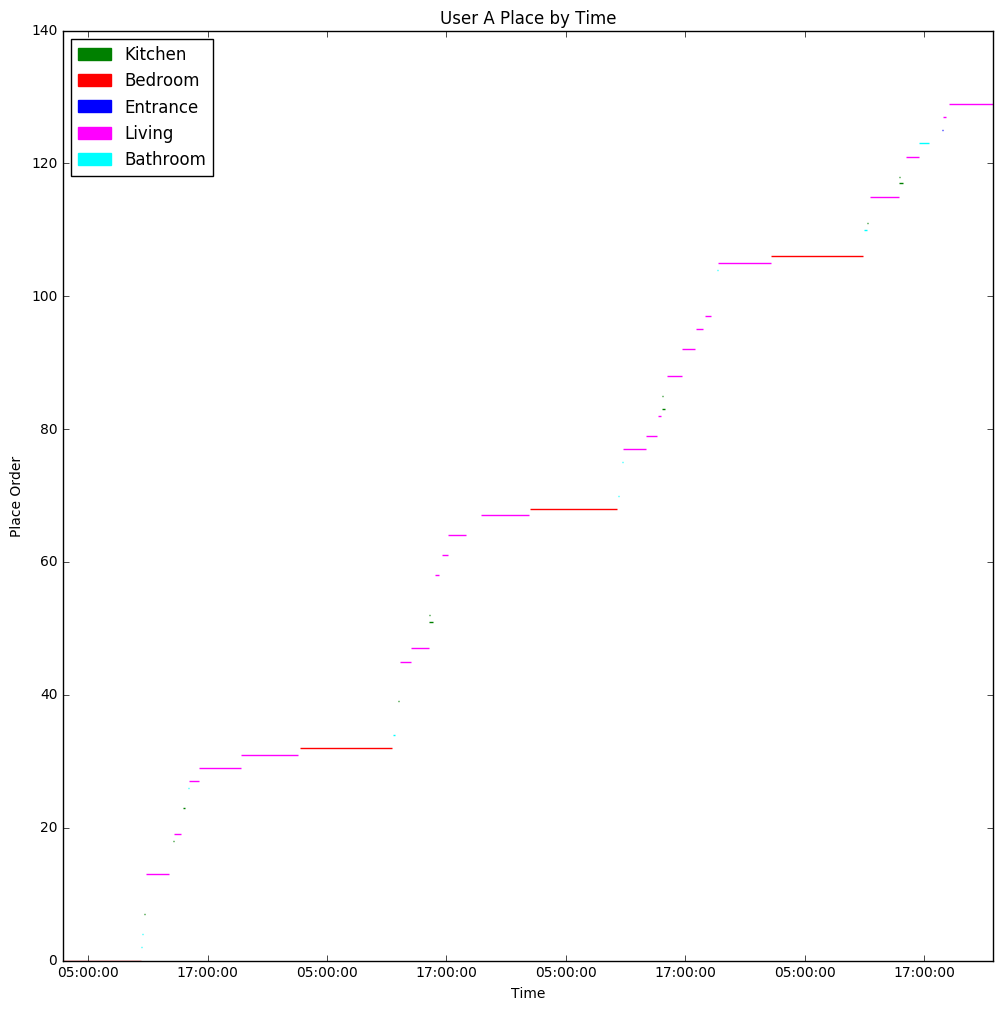

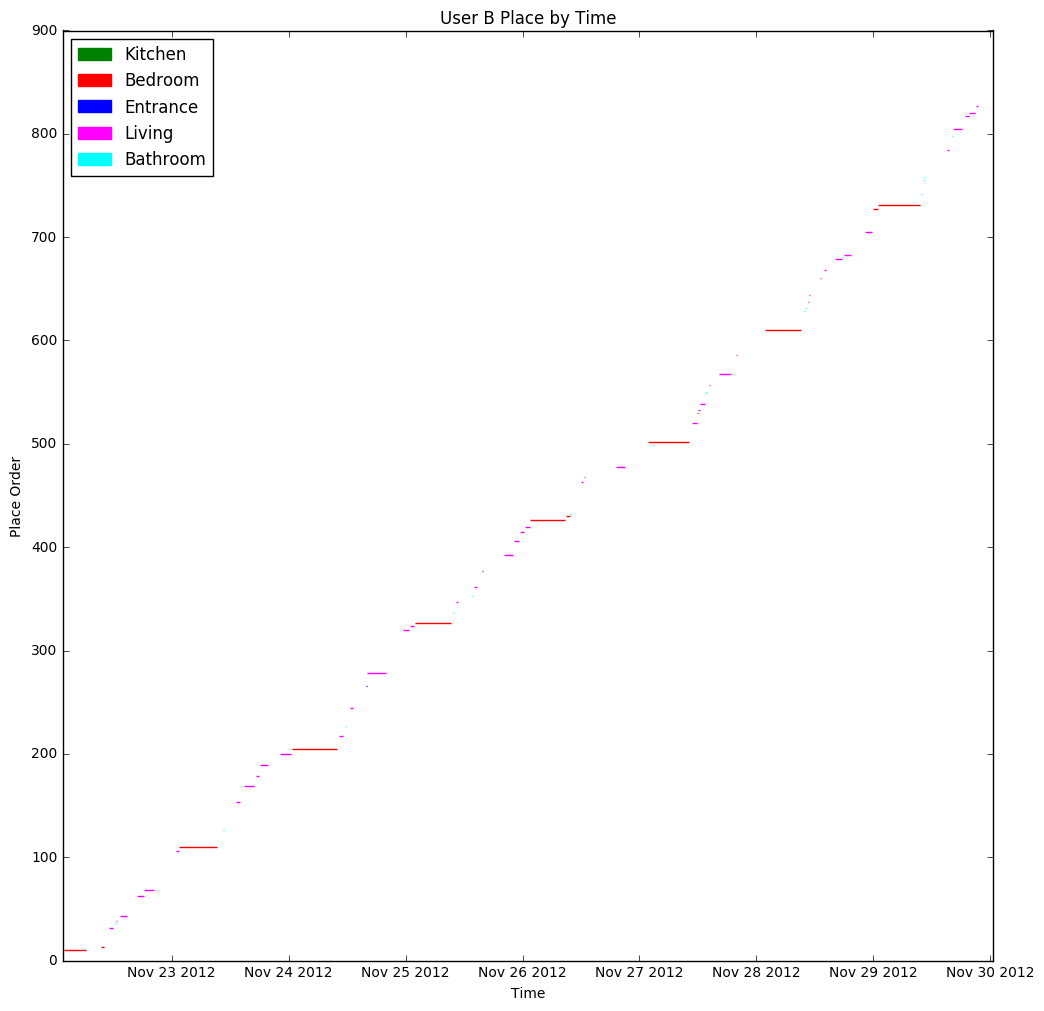

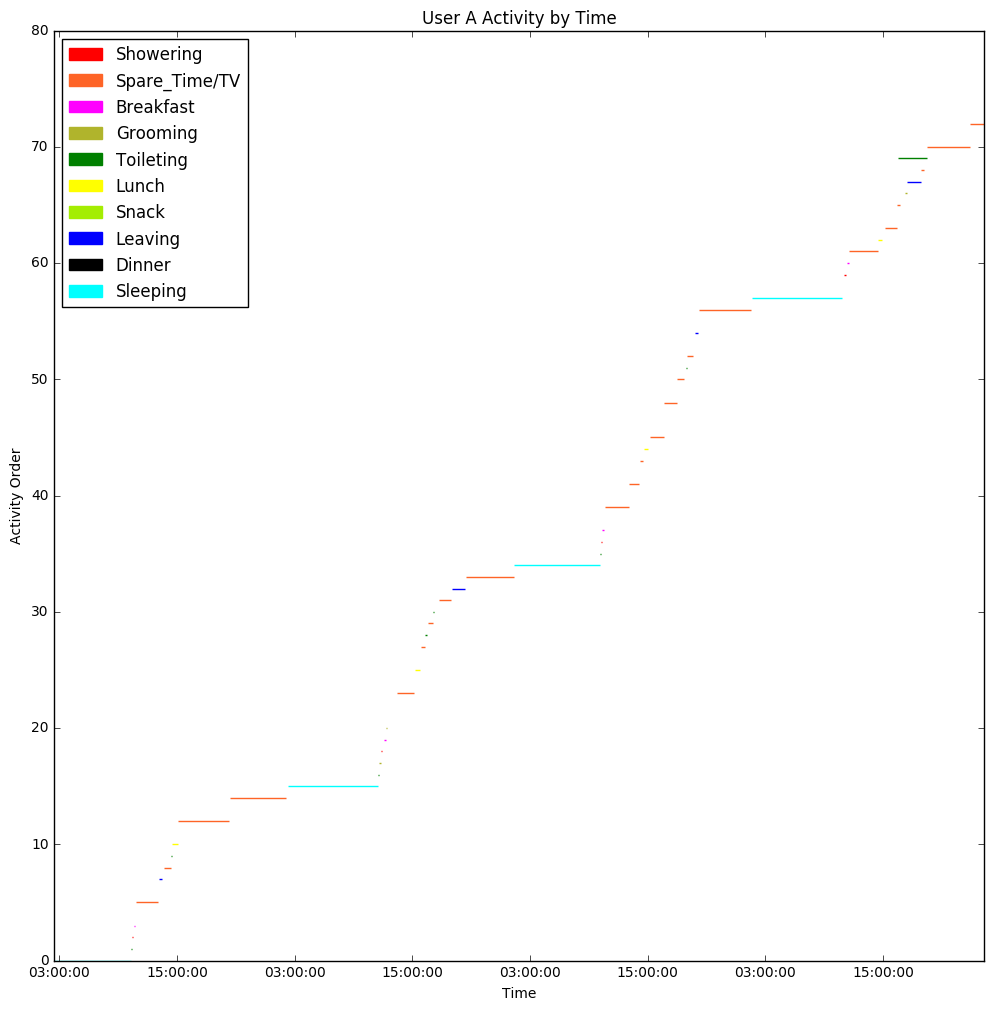

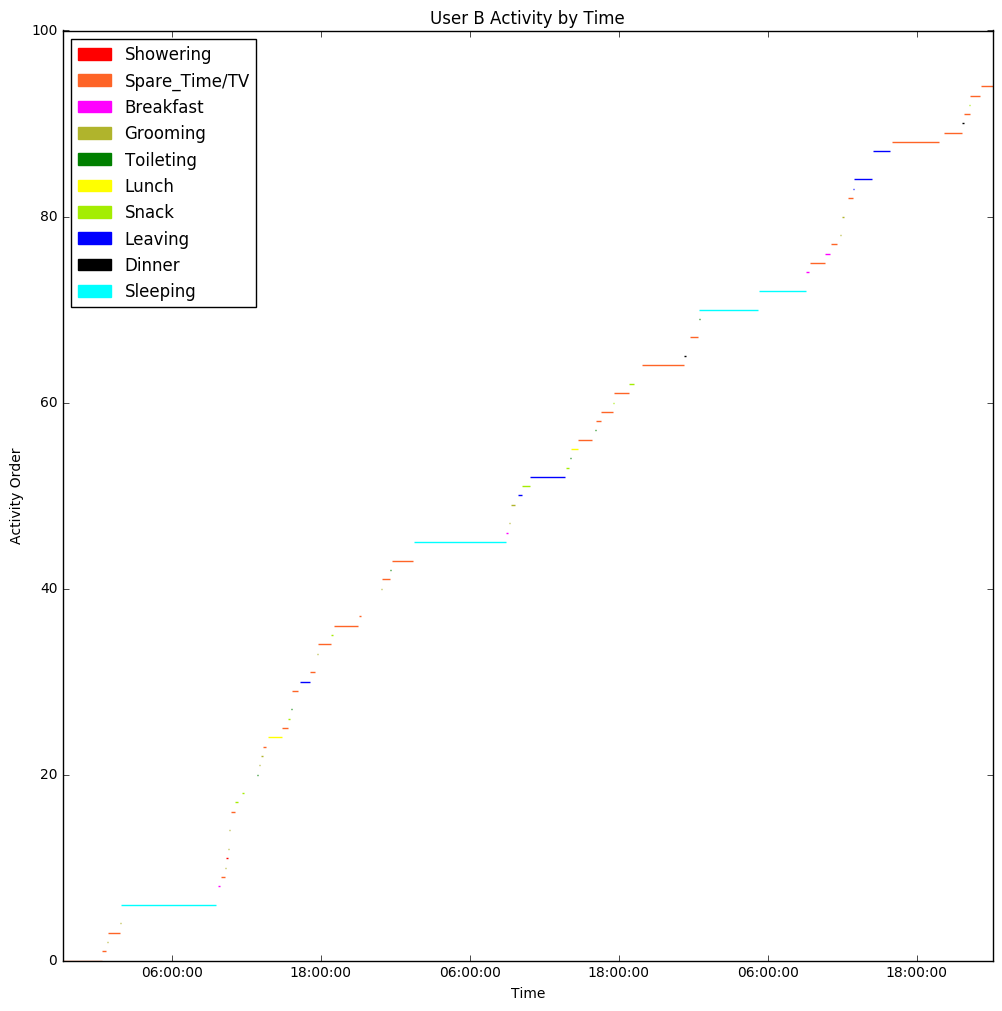

In [212]:
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import matplotlib.patches as mpatches

def plot_adl_gantt_chart(dataframe, user):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)

    ax.set_title('{user} Activity by Time'.format(user=user))

    ax.set_xlabel('Time')
    ax.set_ylabel('Activity Order')

    ax.xaxis_date()
    plt.hlines(dataframe.index, dt.date2num(dataframe.start_time_numpy), dt.date2num(dataframe.end_time_numpy), colors=dataframe["colour"], label=dataframe["activity"]) 
    handles = [mpatches.Patch(color=colour, label=activity) for activity, colour in adl_activity_colour_mapping.items()]
    plt.legend(handles=handles, loc=2)
    
def plot_place_gantt_chart(dataframe, user):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)

    ax.set_title('{user} Place by Time'.format(user=user))

    ax.set_xlabel('Time')
    ax.set_ylabel('Place Order')

    ax.xaxis_date()
    plt.hlines(dataframe.index, dt.date2num(dataframe.start_time_numpy), dt.date2num(dataframe.end_time_numpy), colors=dataframe["place_colour"], label=dataframe["place"]) 
    handles = [mpatches.Patch(color=colour, label=activity) for activity, colour in sensors_place_colour_mapping.items()]
    plt.legend(handles=handles, loc=2)

def plot_location_by_place_gantt_chart(dataframe):
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111)
    fig.add_subplot(221)   #top left
    fig.add_subplot(222)   #top right
    fig.add_subplot(223)   #bottom left
    fig.add_subplot(224) 

    ax.set_title('{user} Activity by Time'.format(user=user))

    ax.set_xlabel('Time')
    ax.set_ylabel('Place Order')

    ax.xaxis_date()
    plt.hlines(dataframe.index, dt.date2num(dataframe.start_time_numpy), dt.date2num(dataframe.end_time_numpy), colors=dataframe["place_colour"], label=dataframe["place"]) 
    handles = [mpatches.Patch(color=colour, label=activity) for activity, colour in sensors_place_colour_mapping.items()]
    plt.legend(handles=handles, loc=2)
    
plot_place_gantt_chart(a_sensors_training, "User A")
plot_place_gantt_chart(b_sensors_training, "User B")
plot_adl_gantt_chart(a_adls_training, "User A")
plot_adl_gantt_chart(b_adls_training, "User B")

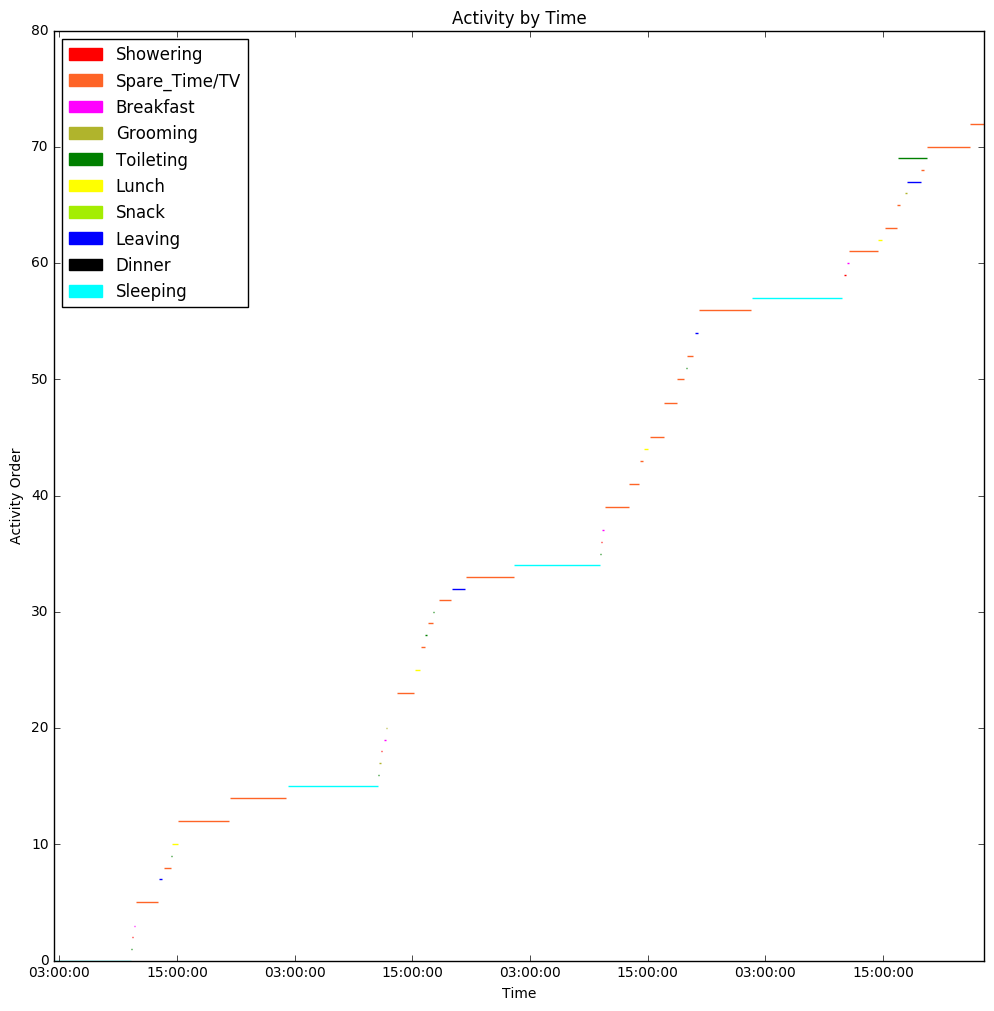

In [199]:
plot_adl_gantt_chart(a_adls_training)

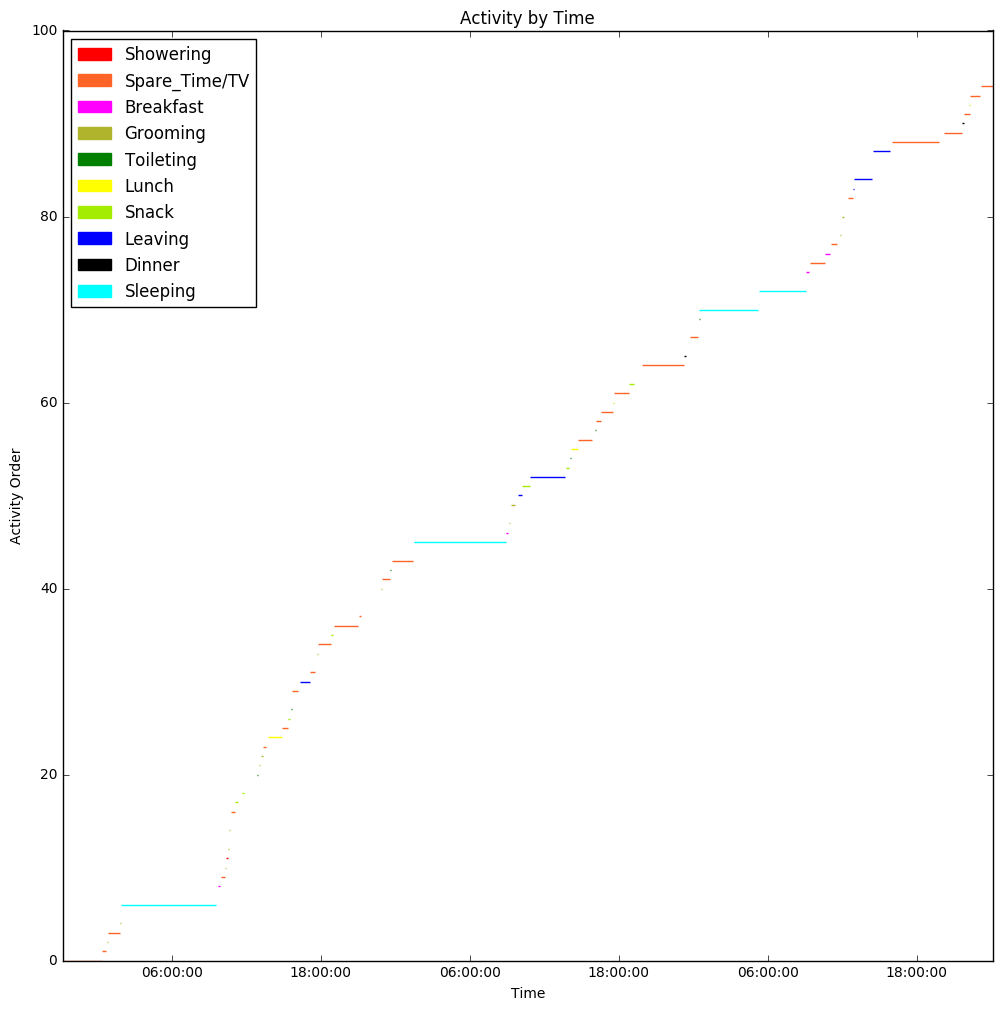

In [168]:
plot_adl_gantt_chart(b_adls_training)